# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results. Always validate findings with your own analysis. ⚠️**

## Overview

This notebook explores Dandiset 000617 ([Allen Institute Openscope - Sequence Learning Project](https://dandiarchive.org/dandiset/000617/0.250312.0130)), which contains two-photon calcium imaging data from mice that were shown sequences of natural movie clips. The experiment investigates how the visual cortex predicts and processes sequential visual stimuli.

In this study, head-fixed mice passively viewed sequences of three different natural movie clips (labeled 'A', 'B', 'C'), each having a duration of 2 seconds, along with a 2-second gray screen (labeled 'X'). Initially, the movie clips were presented in random order to characterize neural responses before sequence learning. Then, the mice were trained with the movie clips presented in a repeating temporal sequence (ABCABC...) for multiple sessions. This training allowed the researchers to study how the mouse's brain learns to predict the next movie clip based on the current one.

The data was collected using 2-photon microscopy with eight simultaneously recorded fields-of-view, including both layer 2/3 and layer 4 from multiple cortical areas: V1 (VISp), LM (VISl), AM (VISam), and PM (VISpm).

## In this notebook, we will:

1. Connect to the DANDI archive and access the dataset
2. Explore the structure of an NWB file from the dataset
3. Visualize calcium imaging data in response to the different movie stimuli
4. Analyze running behavior data during the experiment
5. Look at spatial organization of the imaged neurons

## Required Packages

This notebook requires the following packages (assumed to be already installed):

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
from itertools import islice
import remfile
import h5py
import pynwb
from dandi.dandiapi import DandiAPIClient
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset ID: {metadata['identifier']}")
print(f"Dandiset version: {metadata['version']}")
print(f"Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset ID: DANDI:000617
Dandiset version: 0.250312.0130
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130


### List assets in the Dandiset

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (Size: {asset.size / 1e9:.2f} GB, ID: {asset.identifier})")


First 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (Size: 21.17 GB, ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (Size: 21.16 GB, ID: 4cfa15bb-eac7-4273-9141-6d0cc2034506)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (Size: 21.17 GB, ID: d0b9a557-2c98-4fbc-af96-2318e6e5f2eb)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (Size: 21.16 GB, ID: 6b8f9ba6-2481-4c7b-b78c-38c2b878d246)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (Size: 21.18 GB, ID: c407d5e4-9431-4f94-b5d0-2b28069fa244)


The Dandiset contains multiple NWB files, organized by subject and session. Each session has both raw movie files (which are large, >20GB) and processed files (which are smaller, ~600-700MB). We'll focus on one of the processed files for our analysis.

## Loading and Exploring an NWB File

We'll load one of the processed NWB files to explore its structure and content. We'll use the file `sub-677038_ses-1280089433-acq-1280384858_ophys.nwb`, which contains two-photon calcium imaging data from one imaging session.

In [4]:
# Define the URL for the selected NWB file
url = "https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/"
print(f"Loading NWB file from: {url}")

# Load the remote file directly without downloading
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"\nNWB File Information:")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/



NWB File Information:
Session description: Ophys Session
Session start time: 2023-06-30 16:04:51.055000+00:00
Experiment description: ophys session
Institution: Allen Institute for Brain Science


### Subject Information

In [5]:
# Print information about the subject
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Genotype: {nwb.subject.genotype}")
print(f"Description: {nwb.subject.description}")

Subject ID: 677038
Species: Mus musculus
Age: P92.0D
Sex: F
Genotype: Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt
Description: external: 677038 donor_id: (1271786805,) specimen_id: ['677038']


### NWB File Structure Overview

The NWB file contains a wealth of information organized in a hierarchical structure. Here's a summary of the main components:

In [6]:
# Overview of top-level components in the NWB file
print("Top-level components in the NWB file:")
for key in nwb.fields.keys():
    if key not in ['timestamps_reference_time', 'file_create_date', 'experimenter']:
        print(f"- {key}")

Top-level components in the NWB file:
- session_description
- identifier
- session_start_time
- acquisition
- stimulus_template
- keywords
- processing
- devices
- imaging_planes
- intervals
- subject
- lab_meta_data
- experiment_description
- institution
- surgery


### Imaging Plane Information

The file contains information about the imaging plane used during the experiment.

In [7]:
# Get information about the imaging plane
imaging_plane = nwb.imaging_planes['imaging_plane_1']

print(f"Imaging location: {imaging_plane.location}")
print(f"Imaging rate: {imaging_plane.imaging_rate} Hz")
print(f"Indicator: {imaging_plane.indicator}")
print(f"Description: {imaging_plane.description}")
print(f"Excitation wavelength: {imaging_plane.excitation_lambda} nm")

Imaging location: VISp
Imaging rate: 10.0 Hz
Indicator: GCaMP6f
Description: (512, 512) field of view in VISp at depth 175 um
Excitation wavelength: 910.0 nm


### Stimulus Information

The stimulus templates include three movie clips (A, B, C) and a gray screen. Let's examine their structure:

In [8]:
# Print information about the stimulus templates
print("Stimulus templates:")
for name, stim in nwb.stimulus_template.items():
    print(f"- {name}: Shape {stim.data.shape}, Rate {stim.rate} Hz")

Stimulus templates:
- gray: Shape (1280, 720, 120), Rate 60.0 Hz
- movie_clip_A: Shape (1280, 720, 120), Rate 60.0 Hz
- movie_clip_B: Shape (1280, 720, 120), Rate 60.0 Hz
- movie_clip_C: Shape (1280, 720, 120), Rate 60.0 Hz


### Neural Data Structure

Let's explore the structure of the processed neural data:

In [9]:
# Get information about the ophys processing module
ophys = nwb.processing['ophys']
print("Ophys processing module data interfaces:")
for name in ophys.data_interfaces.keys():
    print(f"- {name}")

Ophys processing module data interfaces:
- corrected_fluorescence
- dff
- event_detection
- image_segmentation
- images
- neuropil_trace
- ophys_motion_correction_x
- ophys_motion_correction_y


The NWB file contains several types of neural data:

1. **corrected_fluorescence**: Raw fluorescence traces after motion correction and baseline correction
2. **dff**: Delta F/F traces (normalized fluorescence responses)
3. **event_detection**: Detected calcium events
4. **image_segmentation**: Information about the ROIs (regions of interest) representing individual neurons
5. **images**: Various images from the experiment, including max projections and segmentation masks
6. **neuropil_trace**: Background fluorescence surrounding each ROI
7. **ophys_motion_correction_x/y**: Motion correction traces showing image movement during recording

Let's look more closely at the cell ROIs:

In [10]:
# Get information about segmented cells
cell_specimen_table = ophys.data_interfaces['image_segmentation'].plane_segmentations['cell_specimen_table']
print(f"Number of ROIs: {len(cell_specimen_table.id)}")

# Convert to pandas DataFrame for easier viewing (first 5 rows)
cell_df = cell_specimen_table.to_dataframe().head()
# Select specific columns to display
display_cols = ['cell_specimen_id', 'x', 'y', 'width', 'height', 'valid_roi']
print("\nFirst 5 ROIs:")
print(cell_df[display_cols])

Number of ROIs: 121



First 5 ROIs:
            cell_specimen_id    x    y  width  height  valid_roi
id                                                              
1285902696                -1   47   47     23      22       True
1285902717                -1  282   32     18      18       True
1285902742                -1  420   35     21      19       True
1285902805                -1  348  196     23      22       True
1285902819                -1  447  197     19      20       True


### Stimulus Presentation Times

The NWB file also contains information about when each stimulus was presented:

In [11]:
# Get information about stimulus presentations
print("Stimulus presentation intervals:")
for name in nwb.intervals.keys():
    if 'presentations' in name:
        presentations = nwb.intervals[name]
        print(f"- {name}: {len(presentations.id)} presentations")

Stimulus presentation intervals:
- gray_presentations: 63000 presentations
- movie_clip_A_presentations: 63000 presentations
- movie_clip_B_presentations: 63000 presentations
- movie_clip_C_presentations: 63000 presentations


Let's look at a sample of the stimulus presentations to better understand their structure:

In [12]:
# Sample of movie_clip_A presentations
movie_a_df = nwb.intervals['movie_clip_A_presentations'].to_dataframe().head(5)
print("Sample of movie_clip_A presentations:")
print(movie_a_df[['start_time', 'stop_time', 'stimulus_name', 'stimulus_block']])

Sample of movie_clip_A presentations:
    start_time  stop_time stimulus_name  stimulus_block
id                                                     
0    22.908110  22.924791  movie_clip_A             0.0
1    22.924791  22.941472  movie_clip_A             0.0
2    22.941472  22.958153  movie_clip_A             0.0
3    22.958153  22.974834  movie_clip_A             0.0
4    22.974834  22.991515  movie_clip_A             0.0


Let's look at how many stimulus blocks are in the dataset:

In [13]:
# Get unique stimulus blocks
movie_a_blocks = nwb.intervals['movie_clip_A_presentations'].to_dataframe()['stimulus_block'].unique()
movie_b_blocks = nwb.intervals['movie_clip_B_presentations'].to_dataframe()['stimulus_block'].unique()
movie_c_blocks = nwb.intervals['movie_clip_C_presentations'].to_dataframe()['stimulus_block'].unique()
gray_blocks = nwb.intervals['gray_presentations'].to_dataframe()['stimulus_block'].unique()

print(f"Number of movie_clip_A stimulus blocks: {len(movie_a_blocks)}")
print(f"Number of movie_clip_B stimulus blocks: {len(movie_b_blocks)}")
print(f"Number of movie_clip_C stimulus blocks: {len(movie_c_blocks)}")
print(f"Number of gray stimulus blocks: {len(gray_blocks)}")

Number of movie_clip_A stimulus blocks: 525
Number of movie_clip_B stimulus blocks: 525
Number of movie_clip_C stimulus blocks: 525
Number of gray stimulus blocks: 525


### Running Behavior Data

The NWB file contains information about the running behavior of the mouse during the experiment:

In [14]:
# Get information about running speed
running = nwb.processing['running']
print("Running data interfaces:")
for name in running.data_interfaces.keys():
    print(f"- {name}")

Running data interfaces:
- dx
- speed
- speed_unfiltered


## Visualizing Neural Activity

Now let's visualize some of the neural activity data in response to the different stimuli. We'll start by looking at the dF/F traces for a few example neurons.

In [15]:
# Get dF/F traces
dff = ophys.data_interfaces['dff'].roi_response_series['traces']
print(f"dF/F data shape: {dff.data.shape}")  # (time_points, num_cells)
print(f"Number of time points: {dff.data.shape[0]}")
print(f"Number of cells: {dff.data.shape[1]}")

# Load a subset of the data for visualization
num_cells_to_plot = 5
num_timepoints = 6000  # ~10 minutes at 10 Hz
cell_indices = np.arange(num_cells_to_plot)  # First 5 cells

# Load the data for selected cells and time points
dff_subset = dff.data[:num_timepoints, cell_indices]
timestamps = dff.timestamps[:num_timepoints]

dF/F data shape: (40019, 121)
Number of time points: 40019
Number of cells: 121


Let's plot the dF/F traces for the selected neurons:

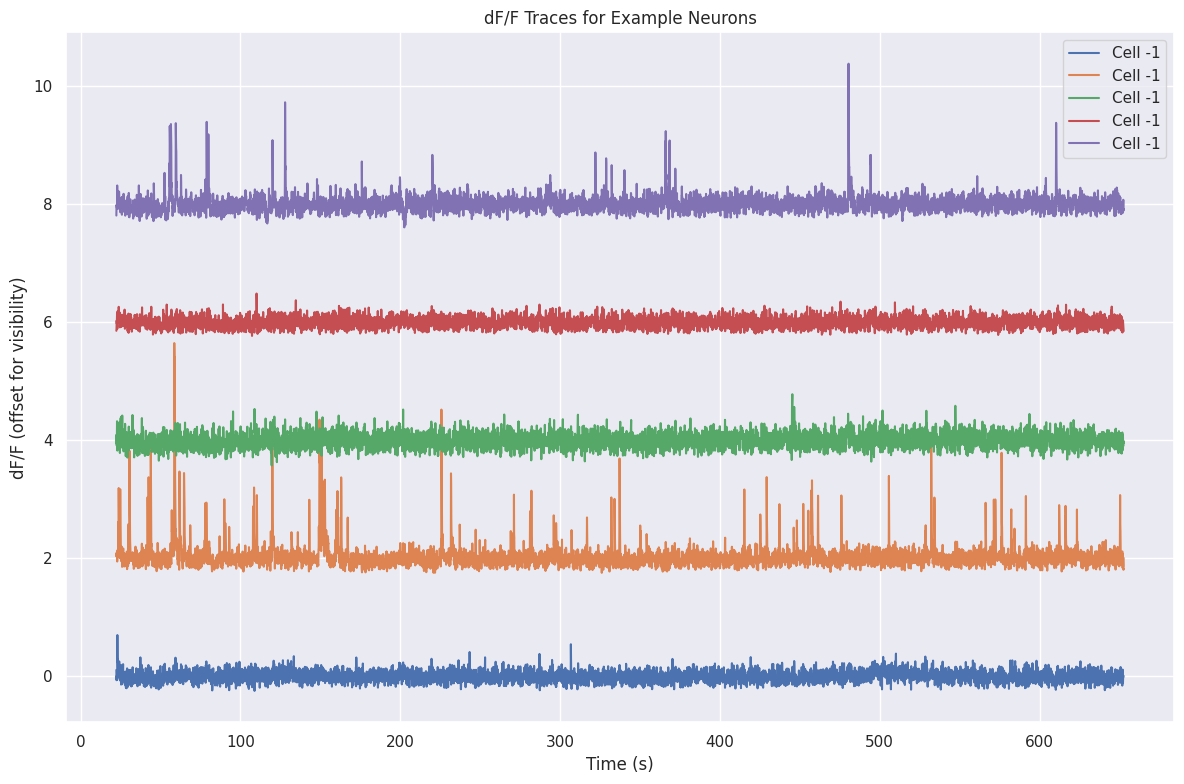

In [16]:
# Plot dF/F traces
plt.figure(figsize=(12, 8))
for i, cell_idx in enumerate(cell_indices):
    # Get the cell specimen ID
    cell_id = cell_specimen_table.cell_specimen_id[cell_idx]
    # Plot the trace with an offset for visibility
    plt.plot(timestamps, dff_subset[:, i] + i*2, label=f"Cell {cell_id}")
    
plt.xlabel('Time (s)')
plt.ylabel('dF/F (offset for visibility)')
plt.title('dF/F Traces for Example Neurons')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Aligning Neural Activity to Stimulus Presentations

Now, let's align the neural activity to the stimulus presentations to see how neurons respond to different movie clips.

In [17]:
# Convert presentation intervals to DataFrames
movie_a_presentations = nwb.intervals['movie_clip_A_presentations'].to_dataframe()
movie_b_presentations = nwb.intervals['movie_clip_B_presentations'].to_dataframe()
movie_c_presentations = nwb.intervals['movie_clip_C_presentations'].to_dataframe()
gray_presentations = nwb.intervals['gray_presentations'].to_dataframe()

# Function to extract dF/F responses aligned to stimulus presentations
def get_aligned_responses(stim_presentations, dff_data, timestamps, window=(-0.5, 2.5)):
    """Extract dF/F responses aligned to stimulus presentations."""
    pre_time, post_time = window
    responses = []
    
    for idx, row in stim_presentations.iterrows():
        start_time = row['start_time']
        # Find the corresponding time indices
        time_mask = (timestamps >= start_time + pre_time) & (timestamps <= start_time + post_time)
        if np.sum(time_mask) > 0:
            # Extract the time-aligned responses
            time_indices = np.where(time_mask)[0]
            aligned_times = timestamps[time_indices] - start_time
            aligned_responses = dff_data[time_indices, :]
            responses.append((aligned_times, aligned_responses, idx))
    
    return responses

# Extract responses for each stimulus type (limiting to first 100 presentations for speed)
movie_a_responses = get_aligned_responses(movie_a_presentations.iloc[:100], dff.data, dff.timestamps)
movie_b_responses = get_aligned_responses(movie_b_presentations.iloc[:100], dff.data, dff.timestamps)
movie_c_responses = get_aligned_responses(movie_c_presentations.iloc[:100], dff.data, dff.timestamps)
gray_responses = get_aligned_responses(gray_presentations.iloc[:100], dff.data, dff.timestamps)

print(f"Number of aligned responses: Movie A: {len(movie_a_responses)}, Movie B: {len(movie_b_responses)}, Movie C: {len(movie_c_responses)}, Gray: {len(gray_responses)}")

TypeError: '>=' not supported between instances of 'Dataset' and 'float'

Now let's visualize the average responses to each stimulus type for a few example neurons:

In [18]:
# Function to compute average responses
def compute_average_response(responses, cell_idx):
    """Compute average response for a specific cell."""
    # Get all responses for the cell
    all_times = []
    all_responses = []
    for time_points, resp, _ in responses:
        all_times.append(time_points)
        all_responses.append(resp[:, cell_idx])
    
    # Find common time points
    all_time_arrays = np.array([t for t in all_times if len(t) > 0])
    if len(all_time_arrays) == 0:
        return None, None
    
    # Get unique sorted time points across all responses
    unique_times = np.unique(np.concatenate(all_time_arrays))
    unique_times.sort()
    
    # Interpolate responses to common time points
    interp_responses = []
    for i, (time_points, resp) in enumerate(zip(all_times, all_responses)):
        if len(time_points) > 0:
            interp_resp = np.interp(unique_times, time_points, resp, left=np.nan, right=np.nan)
            interp_responses.append(interp_resp)
    
    # Compute average response (ignoring NaNs)
    avg_response = np.nanmean(interp_responses, axis=0)
    sem_response = np.nanstd(interp_responses, axis=0) / np.sqrt(np.sum(~np.isnan(interp_responses), axis=0))
    
    return unique_times, avg_response, sem_response

Let's plot the average responses for a few example neurons:

NameError: name 'movie_a_responses' is not defined

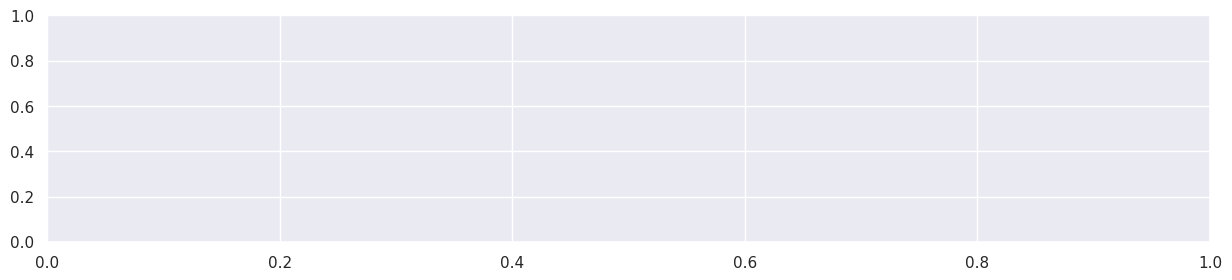

In [19]:
# Plot average responses for example neurons
num_cells_to_plot = 3
cell_indices = np.arange(num_cells_to_plot)

plt.figure(figsize=(15, 10))
for i, cell_idx in enumerate(cell_indices):
    plt.subplot(num_cells_to_plot, 1, i+1)
    
    # Get cell ID
    cell_id = cell_specimen_table.cell_specimen_id[cell_idx]
    
    # Compute average responses for each stimulus type
    a_times, a_avg, a_sem = compute_average_response(movie_a_responses, cell_idx)
    b_times, b_avg, b_sem = compute_average_response(movie_b_responses, cell_idx)
    c_times, c_avg, c_sem = compute_average_response(movie_c_responses, cell_idx)
    g_times, g_avg, g_sem = compute_average_response(gray_responses, cell_idx)
    
    # Plot the average responses
    if a_times is not None:
        plt.fill_between(a_times, a_avg - a_sem, a_avg + a_sem, alpha=0.3, color='red')
        plt.plot(a_times, a_avg, 'r-', label='Movie A')
    
    if b_times is not None:
        plt.fill_between(b_times, b_avg - b_sem, b_avg + b_sem, alpha=0.3, color='green')
        plt.plot(b_times, b_avg, 'g-', label='Movie B')
    
    if c_times is not None:
        plt.fill_between(c_times, c_avg - c_sem, c_avg + c_sem, alpha=0.3, color='blue')
        plt.plot(c_times, c_avg, 'b-', label='Movie C')
    
    if g_times is not None:
        plt.fill_between(g_times, g_avg - g_sem, g_avg + g_sem, alpha=0.3, color='gray')
        plt.plot(g_times, g_avg, 'k-', label='Gray')
    
    # Add stimulus period indicator
    plt.axvspan(0, 2.0, alpha=0.2, color='lightgray')
    plt.axvline(0, color='k', linestyle='--')  # Stimulus onset
    plt.axvline(2.0, color='k', linestyle='--')  # Stimulus offset
    
    plt.xlabel('Time from stimulus onset (s)')
    plt.ylabel('dF/F')
    plt.title(f'Cell {cell_id} - Average Responses to Different Stimuli')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Comparing Neural Activity During Running vs. Stationary Periods

Let's look at how neural activity differs when the mouse is running versus when it's stationary:

Running speed data shape: (252000,)
Running speed timestamps shape: (252000,)


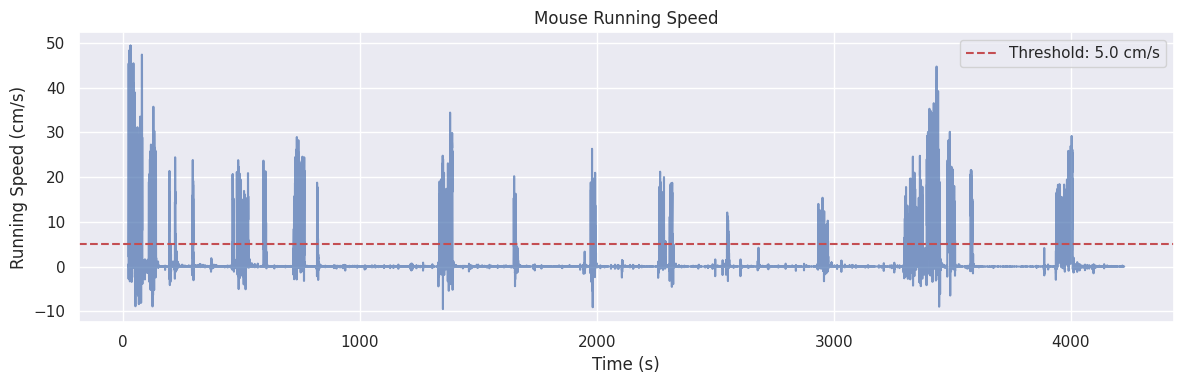

In [20]:
# Get running speed data
speed = nwb.processing['running'].data_interfaces['speed']
print(f"Running speed data shape: {speed.data.shape}")
print(f"Running speed timestamps shape: {speed.timestamps.shape}")

# Load a subset of the data for visualization
running_data = speed.data[:]  # All data
running_timestamps = speed.timestamps[:]  # All timestamps

# Determine running vs. stationary periods
# Define a threshold for running (e.g., 5 cm/s)
running_threshold = 5.0  # cm/s
is_running = running_data > running_threshold

# Plot running speed
plt.figure(figsize=(12, 4))
plt.plot(running_timestamps, running_data, 'b-', alpha=0.7)
plt.axhline(running_threshold, color='r', linestyle='--', label=f'Threshold: {running_threshold} cm/s')
plt.xlabel('Time (s)')
plt.ylabel('Running Speed (cm/s)')
plt.title('Mouse Running Speed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now let's bin running speed data to match the sampling rate of the calcium imaging data:

In [21]:
# Function to bin running data to match calcium imaging timestamps
def bin_running_data(running_timestamps, running_data, dff_timestamps):
    """Bin running data to match dF/F timestamps."""
    binned_running = np.zeros_like(dff_timestamps)
    
    for i, t in enumerate(dff_timestamps):
        # Find the closest running timestamps before and after
        idx_before = np.where(running_timestamps <= t)[0]
        idx_after = np.where(running_timestamps > t)[0]
        
        if len(idx_before) > 0 and len(idx_after) > 0:
            # Average the closest data points
            before_idx = idx_before[-1]
            after_idx = idx_after[0]
            before_weight = 1 - (t - running_timestamps[before_idx]) / (running_timestamps[after_idx] - running_timestamps[before_idx])
            after_weight = 1 - before_weight
            binned_running[i] = before_weight * running_data[before_idx] + after_weight * running_data[after_idx]
        elif len(idx_before) > 0:
            # If there's no after point, use the last before point
            binned_running[i] = running_data[idx_before[-1]]
        elif len(idx_after) > 0:
            # If there's no before point, use the first after point
            binned_running[i] = running_data[idx_after[0]]
        else:
            # This shouldn't happen, but just in case
            binned_running[i] = np.nan
    
    return binned_running

# Bin running data to match dF/F timestamps
binned_running = bin_running_data(running_timestamps, running_data, dff.timestamps[:])
is_running_binned = binned_running > running_threshold

Now let's compare the average activity for running vs. stationary periods for a few example neurons:

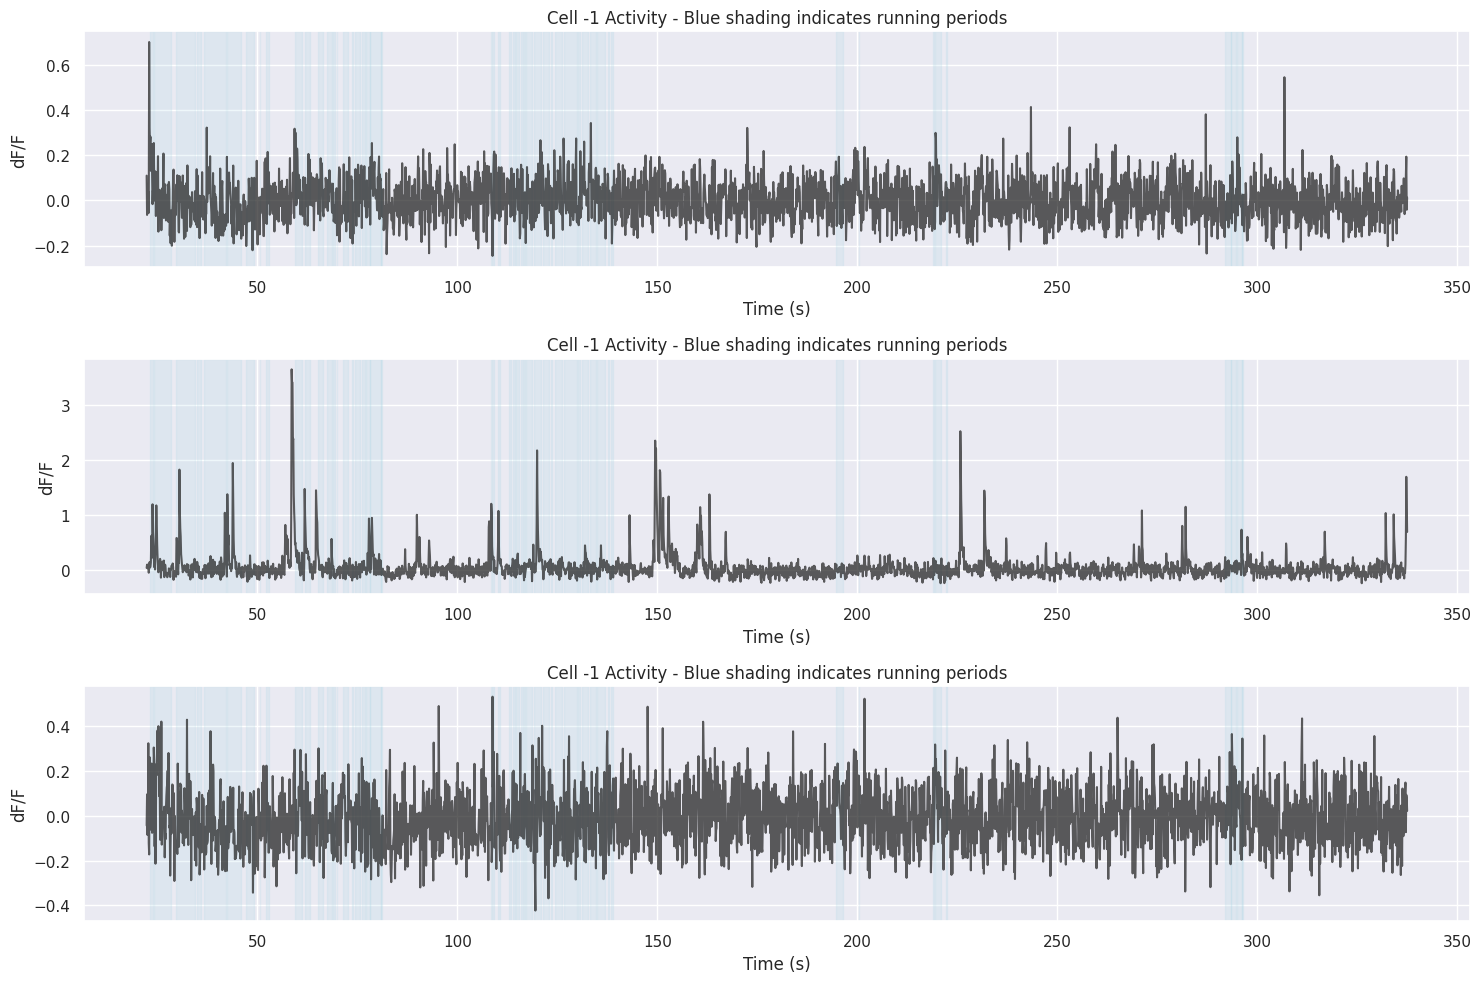

In [22]:
# Select a subset of data for visualization
time_window = 3000  # ~5 minutes at 10 Hz
num_cells_to_plot = 3
cell_indices = np.arange(num_cells_to_plot)

plt.figure(figsize=(15, 10))

for i, cell_idx in enumerate(cell_indices):
    plt.subplot(num_cells_to_plot, 1, i+1)
    
    # Get cell ID
    cell_id = cell_specimen_table.cell_specimen_id[cell_idx]
    
    # Get dF/F data for this cell
    cell_dff = dff.data[:time_window, cell_idx]
    cell_timestamps = dff.timestamps[:time_window]
    cell_running = is_running_binned[:time_window]
    
    # Plot dF/F
    plt.plot(cell_timestamps, cell_dff, 'k-', alpha=0.7, label='dF/F')
    
    # Highlight running periods
    for j in range(1, len(cell_running)):
        if cell_running[j-1] == False and cell_running[j] == True:
            # Start of a running bout
            start_idx = j
        elif cell_running[j-1] == True and cell_running[j] == False:
            # End of a running bout
            end_idx = j
            plt.axvspan(cell_timestamps[start_idx], cell_timestamps[end_idx], 
                        alpha=0.2, color='lightblue')
    
    plt.xlabel('Time (s)')
    plt.ylabel('dF/F')
    plt.title(f'Cell {cell_id} Activity - Blue shading indicates running periods')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Visualizing Spatial Organization of Neurons

Let's visualize the spatial organization of the imaged neurons and their average responses to different stimuli:

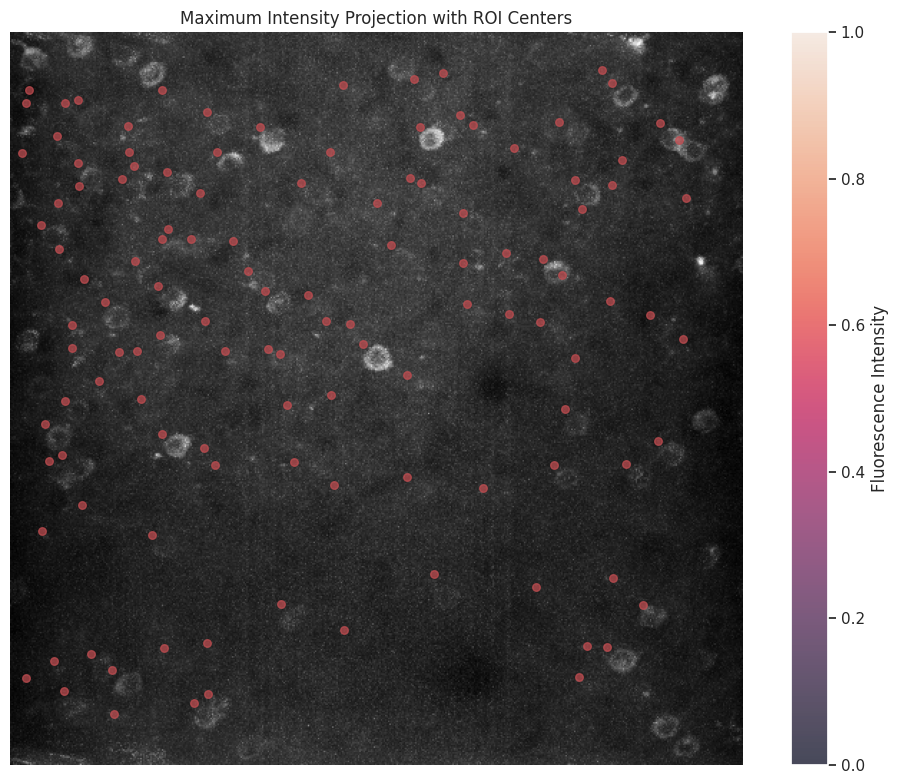

In [23]:
# Get the segmentation mask image
segmentation_mask = ophys.data_interfaces['images'].images['segmentation_mask_image']

# Get the max projection image (background)
max_projection = ophys.data_interfaces['images'].images['max_projection']

# Create a figure to display the spatial organization
plt.figure(figsize=(10, 8))
plt.imshow(max_projection.data, cmap='gray')
plt.title('Maximum Intensity Projection with ROI Centers')
plt.axis('off')

# Plot ROI centers
roi_x = cell_specimen_table.x[:]
roi_y = cell_specimen_table.y[:]
plt.scatter(roi_x, roi_y, s=30, c='r', marker='o', alpha=0.7)

# Add a colorbar to indicate the scale
plt.colorbar(label='Fluorescence Intensity')
plt.tight_layout()
plt.show()

Let's visualize all ROIs with their outlines:

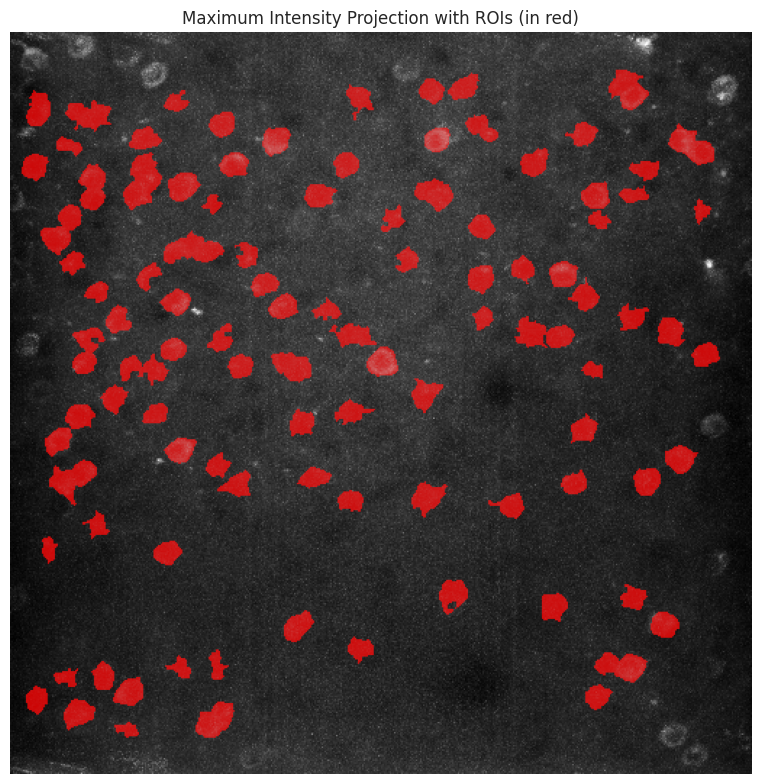

In [24]:
# Create a composite image with all ROIs
mask_images = np.array([mask for mask in cell_specimen_table.image_mask[:]])

# Create a composite RGB image
composite_image = np.zeros((512, 512, 3), dtype=float)
# Add the max projection as background (grayscale to all channels)
max_proj_norm = max_projection.data / np.max(max_projection.data)
for c in range(3):
    composite_image[:, :, c] = max_proj_norm

# Create a mask showing all ROIs
all_masks = np.max(mask_images, axis=0)

# Add ROIs to the image (in red)
composite_image[:, :, 0] = np.maximum(composite_image[:, :, 0], all_masks * 0.8)
composite_image[:, :, 1] = composite_image[:, :, 1] * (1 - all_masks * 0.5)
composite_image[:, :, 2] = composite_image[:, :, 2] * (1 - all_masks * 0.5)

plt.figure(figsize=(10, 8))
plt.imshow(np.clip(composite_image, 0, 1))
plt.title('Maximum Intensity Projection with ROIs (in red)')
plt.axis('off')
plt.tight_layout()
plt.show()

### Analysis of Cell Responses to Different Stimuli

In [25]:
# Let's compute the average response to each stimulus for all cells
def compute_response_metric(responses, cell_idx):
    """Compute a response metric (mean dF/F during stimulus) for a cell."""
    all_responses = []
    
    for time_points, resp, _ in responses:
        if len(time_points) > 0:
            # Find indices where time is between 0 and 2 seconds (during stimulus)
            stimulus_mask = (time_points >= 0) & (time_points <= 2)
            if np.any(stimulus_mask):
                # Compute mean response during stimulus
                mean_resp = np.mean(resp[stimulus_mask, cell_idx])
                all_responses.append(mean_resp)
    
    if len(all_responses) > 0:
        return np.mean(all_responses)
    else:
        return np.nan

# Compute response metrics for each cell and stimulus
num_cells = dff.data.shape[1]
response_metrics = np.zeros((num_cells, 4))  # [movie_a, movie_b, movie_c, gray]

for cell_idx in range(num_cells):
    response_metrics[cell_idx, 0] = compute_response_metric(movie_a_responses, cell_idx)
    response_metrics[cell_idx, 1] = compute_response_metric(movie_b_responses, cell_idx)
    response_metrics[cell_idx, 2] = compute_response_metric(movie_c_responses, cell_idx)
    response_metrics[cell_idx, 3] = compute_response_metric(gray_responses, cell_idx)

# Create a DataFrame of response metrics
response_df = pd.DataFrame(
    response_metrics, 
    columns=['Movie A', 'Movie B', 'Movie C', 'Gray']
)
response_df['Cell ID'] = cell_specimen_table.cell_specimen_id[:]
response_df = response_df.set_index('Cell ID')

# Display the first few rows
print("Average dF/F response during stimulus presentation:")
print(response_df.head())

NameError: name 'movie_a_responses' is not defined

Let's visualize the distribution of responses to each stimulus across all cells:

In [26]:
# Plot response distributions
plt.figure(figsize=(12, 6))

# Create a violinplot
sns.violinplot(data=response_df, palette="muted")
plt.title('Distribution of Cell Responses to Different Stimuli')
plt.ylabel('Average dF/F Response During Stimulus')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'response_df' is not defined

<Figure size 1200x600 with 0 Axes>

Let's look at whether cells have preferences for particular movie clips:

In [27]:
# Determine the preferred stimulus for each cell
preferred_stimulus = response_df.idxmax(axis=1)
stimulus_counts = preferred_stimulus.value_counts()

plt.figure(figsize=(8, 6))
stimulus_counts.plot(kind='bar', color=['red', 'green', 'blue', 'gray'])
plt.title('Number of Cells Preferring Each Stimulus')
plt.xlabel('Preferred Stimulus')
plt.ylabel('Number of Cells')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'response_df' is not defined

### Spatial Organization of Stimulus Preferences

Let's visualize whether cells with similar stimulus preferences are spatially clustered:

NameError: name 'preferred_stimulus' is not defined

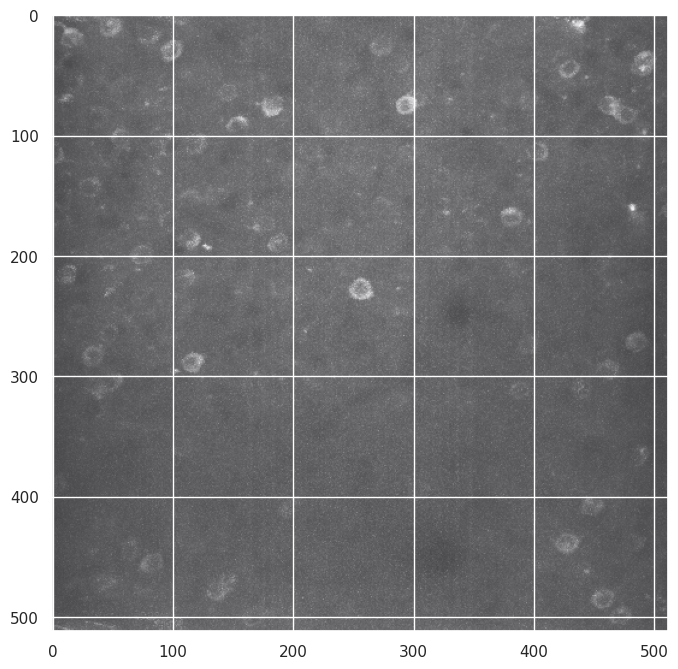

In [28]:
# Create a scatter plot of cell positions colored by preferred stimulus
plt.figure(figsize=(10, 8))
plt.imshow(max_projection.data, cmap='gray', alpha=0.7)

# Create a color map for plotting
stim_colors = {'Movie A': 'red', 'Movie B': 'green', 'Movie C': 'blue', 'Gray': 'gray'}

# Plot each cell's position
for idx in range(num_cells):
    cell_id = cell_specimen_table.cell_specimen_id[idx]
    pref_stim = preferred_stimulus.loc[cell_id]
    plt.scatter(cell_specimen_table.x[idx], cell_specimen_table.y[idx], 
                s=30, c=stim_colors[pref_stim], marker='o', alpha=0.7)

# Add a legend
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=color, label=stim) for stim, color in stim_colors.items()]
plt.legend(handles=handles, loc='upper right')

plt.title('Spatial Organization of Preferred Stimuli')
plt.axis('off')
plt.tight_layout()
plt.show()

## Summary and Future Directions

In this notebook, we explored the Allen Institute Openscope Sequence Learning Project dataset (Dandiset 000617), which contains two-photon calcium imaging data from mice presented with sequences of movie clips.

### Key Findings:

1. We successfully loaded and explored the structure of an NWB file containing two-photon calcium imaging data from visual cortex.

2. We visualized calcium traces (dF/F) for individual neurons and their responses to different movie clips.

3. We analyzed how neural activity relates to the mouse's running behavior.

4. We visualized the spatial organization of neurons in the field of view and their preferences for different movie stimuli.

### Observations:

- Individual neurons show distinct response patterns to different movie clips, with some neurons responding more strongly to particular clips.

- Cells show varying preferences for the different movie stimuli, with each movie clip having a subset of cells that respond preferentially to it.

- There may be some spatial clustering of neurons with similar stimulus preferences, though a more detailed analysis would be needed to confirm this.

### Future Directions:

1. **Sequence Learning Analysis**: The primary purpose of this dataset is to study sequence learning. Future analysis could compare neural responses before and after training with the repeated ABC sequence to examine how learning affects prediction.

2. **Cross-Session Comparisons**: The dataset includes recordings across multiple days. Future analysis could track the same neurons across sessions to observe how their responses evolve with training.

3. **Response Timing Analysis**: A more detailed analysis of the timing of neural responses could reveal prediction-related activity, such as anticipatory responses that occur before the next stimulus in the sequence.

4. **Population-Level Analysis**: Dimensionality reduction techniques like PCA or t-SNE could reveal population-level patterns in neural activity that aren't apparent at the single-neuron level.

5. **Detailed ROI Analysis**: Further analysis of the spatial distribution and morphology of ROIs could provide insights into cell type and circuit organization.

6. **Comparison Across Brain Regions**: The dataset includes recordings from multiple visual cortical areas. Comparing how sequence learning differs across these areas could provide insights into the hierarchical organization of prediction in the visual system.

This dataset provides a rich resource for studying how the visual system learns and predicts sequences of visual stimuli. The analyses presented here provide an introduction to the dataset and some basic visualizations, but there are many more sophisticated analyses that could be performed to gain deeper insights into sequence learning in the visual cortex.

## Explore this NWB File in Neurosift

You can explore this NWB file in Neurosift, an online viewer for neurophysiology data, by following this link:

[View in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=0.250312.0130)